In [19]:
# Copyright (c) Meta Platforms, Inc. and affiliates.

# This source code is licensed under the BSD-style license found in the
# LICENSE file in the root directory of this source tree.

In [20]:
from src import LTVSyntheticData
from src import LTVexploratory

### Generate synthetic data 

In [21]:
synth_data_gen = LTVSyntheticData(is_subscr=False)
ancor_table = synth_data_gen.get_ancor_table()
event_table = synth_data_gen.get_purchases()

# Call the exploratory class
da = LTVexploratory(ancor_table, event_table)

/Users/raphaeltamaki/Documents/git/LTVision/src/synth_data.py:343: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  purchases = pd.concat([purchases, high_payers_payments, mid_payers_payments, low_payers_payments], ignore_index=True)


,table,number_uuid,share_uuid
0,ancor only,8004,80.04%
1,event only,0,0.00%
2,ancor & event,1996,19.96%


We are going to delete 0.00% UUID from df table because of negative value between first purchase date and registration


### Run analysis

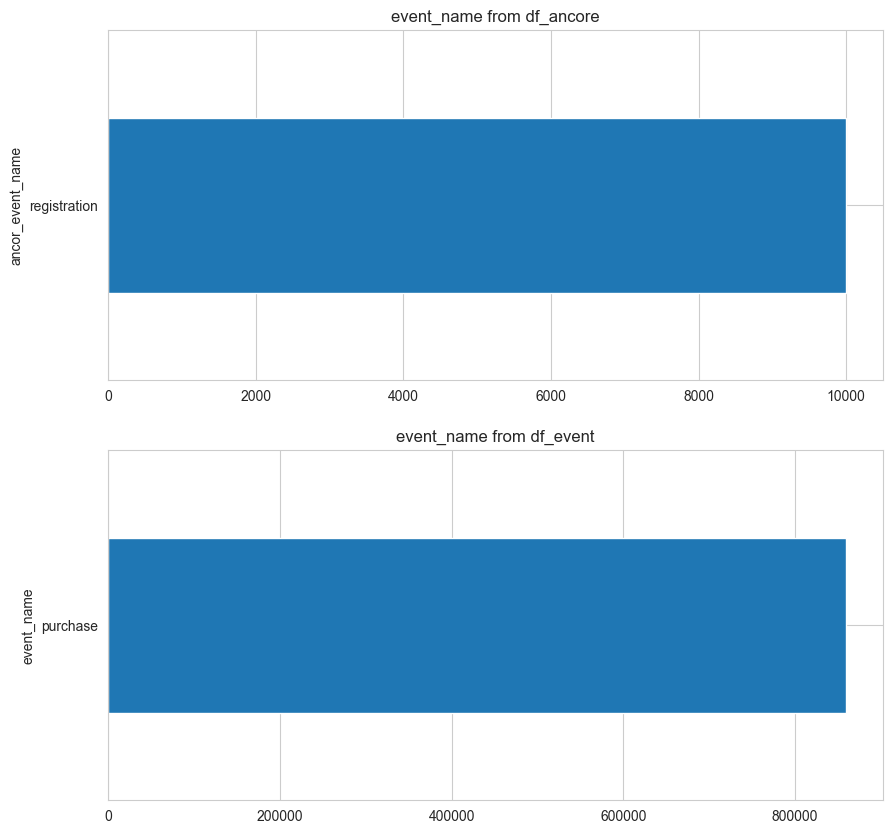

In [22]:
da.plot_n()

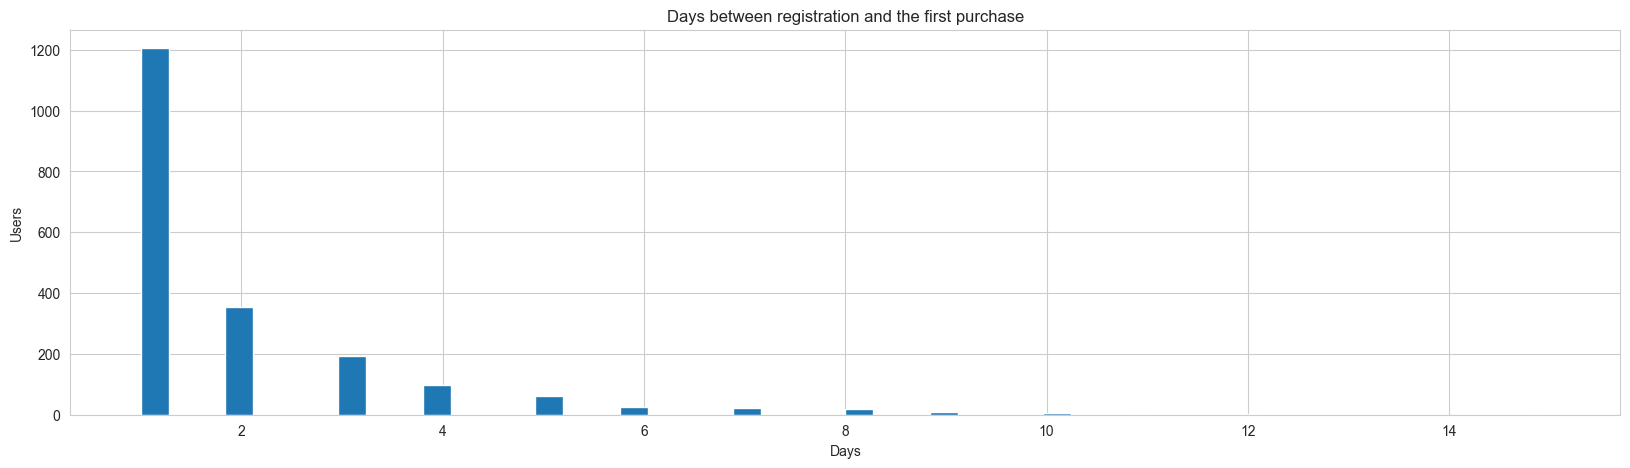

,Days between registration and the first purchase stat:
count,1996.0
mean,1.9
std,1.6
min,1.0
25%,1.0
50%,1.0
75%,2.0
max,15.0


In [23]:
da.plot_first_purchase()

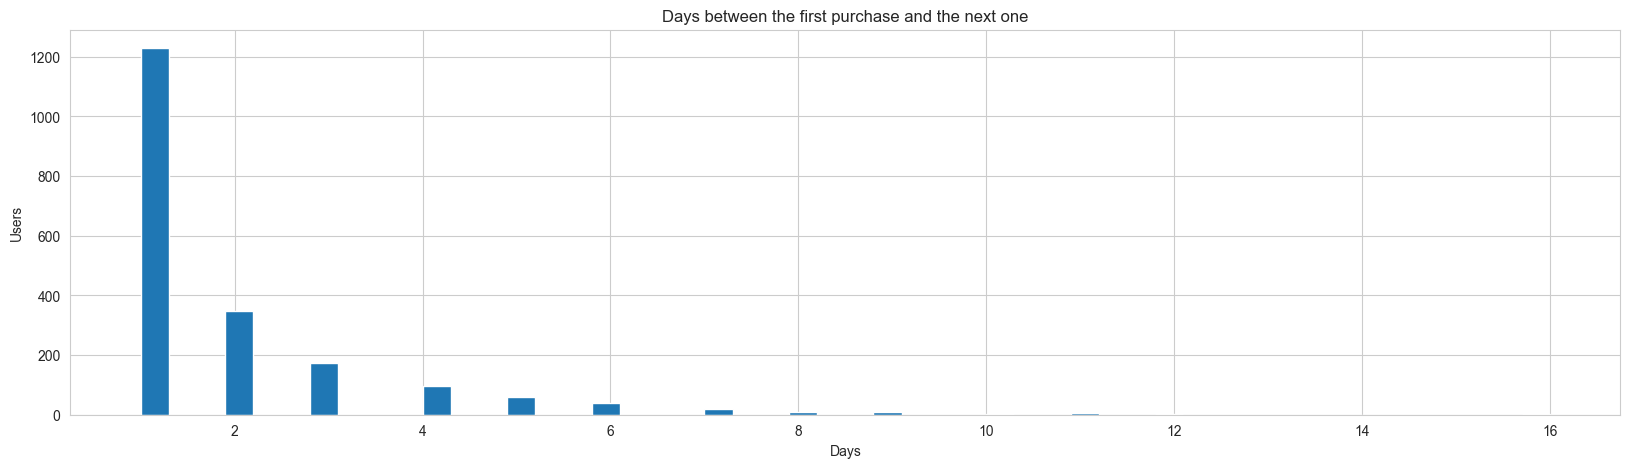

,Days between the first purchase and the next one stat:
count,1990.0
mean,1.9
std,1.6
min,1.0
25%,1.0
50%,1.0
75%,2.0
max,16.0
users without second purchase,0.30%


You have 0.00% purchases with zero value


In [24]:
da.plot_second_purchase()

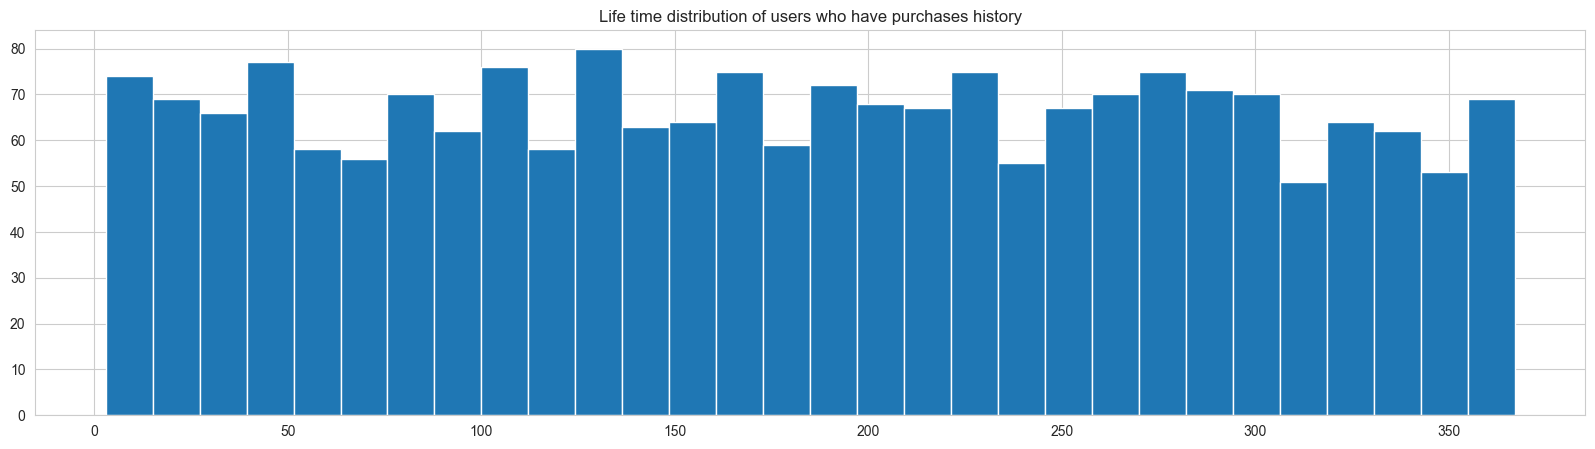

In [25]:
da.plot_uuid()

The main idea of this chart: Do we have a strong linear correlation in order to build linear model? (1 - yes, 0 - no)
The main idea of this chart: if we take (ltv value for 7 days) as a feture to our linear model in order to predict (ltv value for day 14)
        how well the regression model explains observed data (proportion of the variation in the dependent variable that is predictable from the independent variable)?


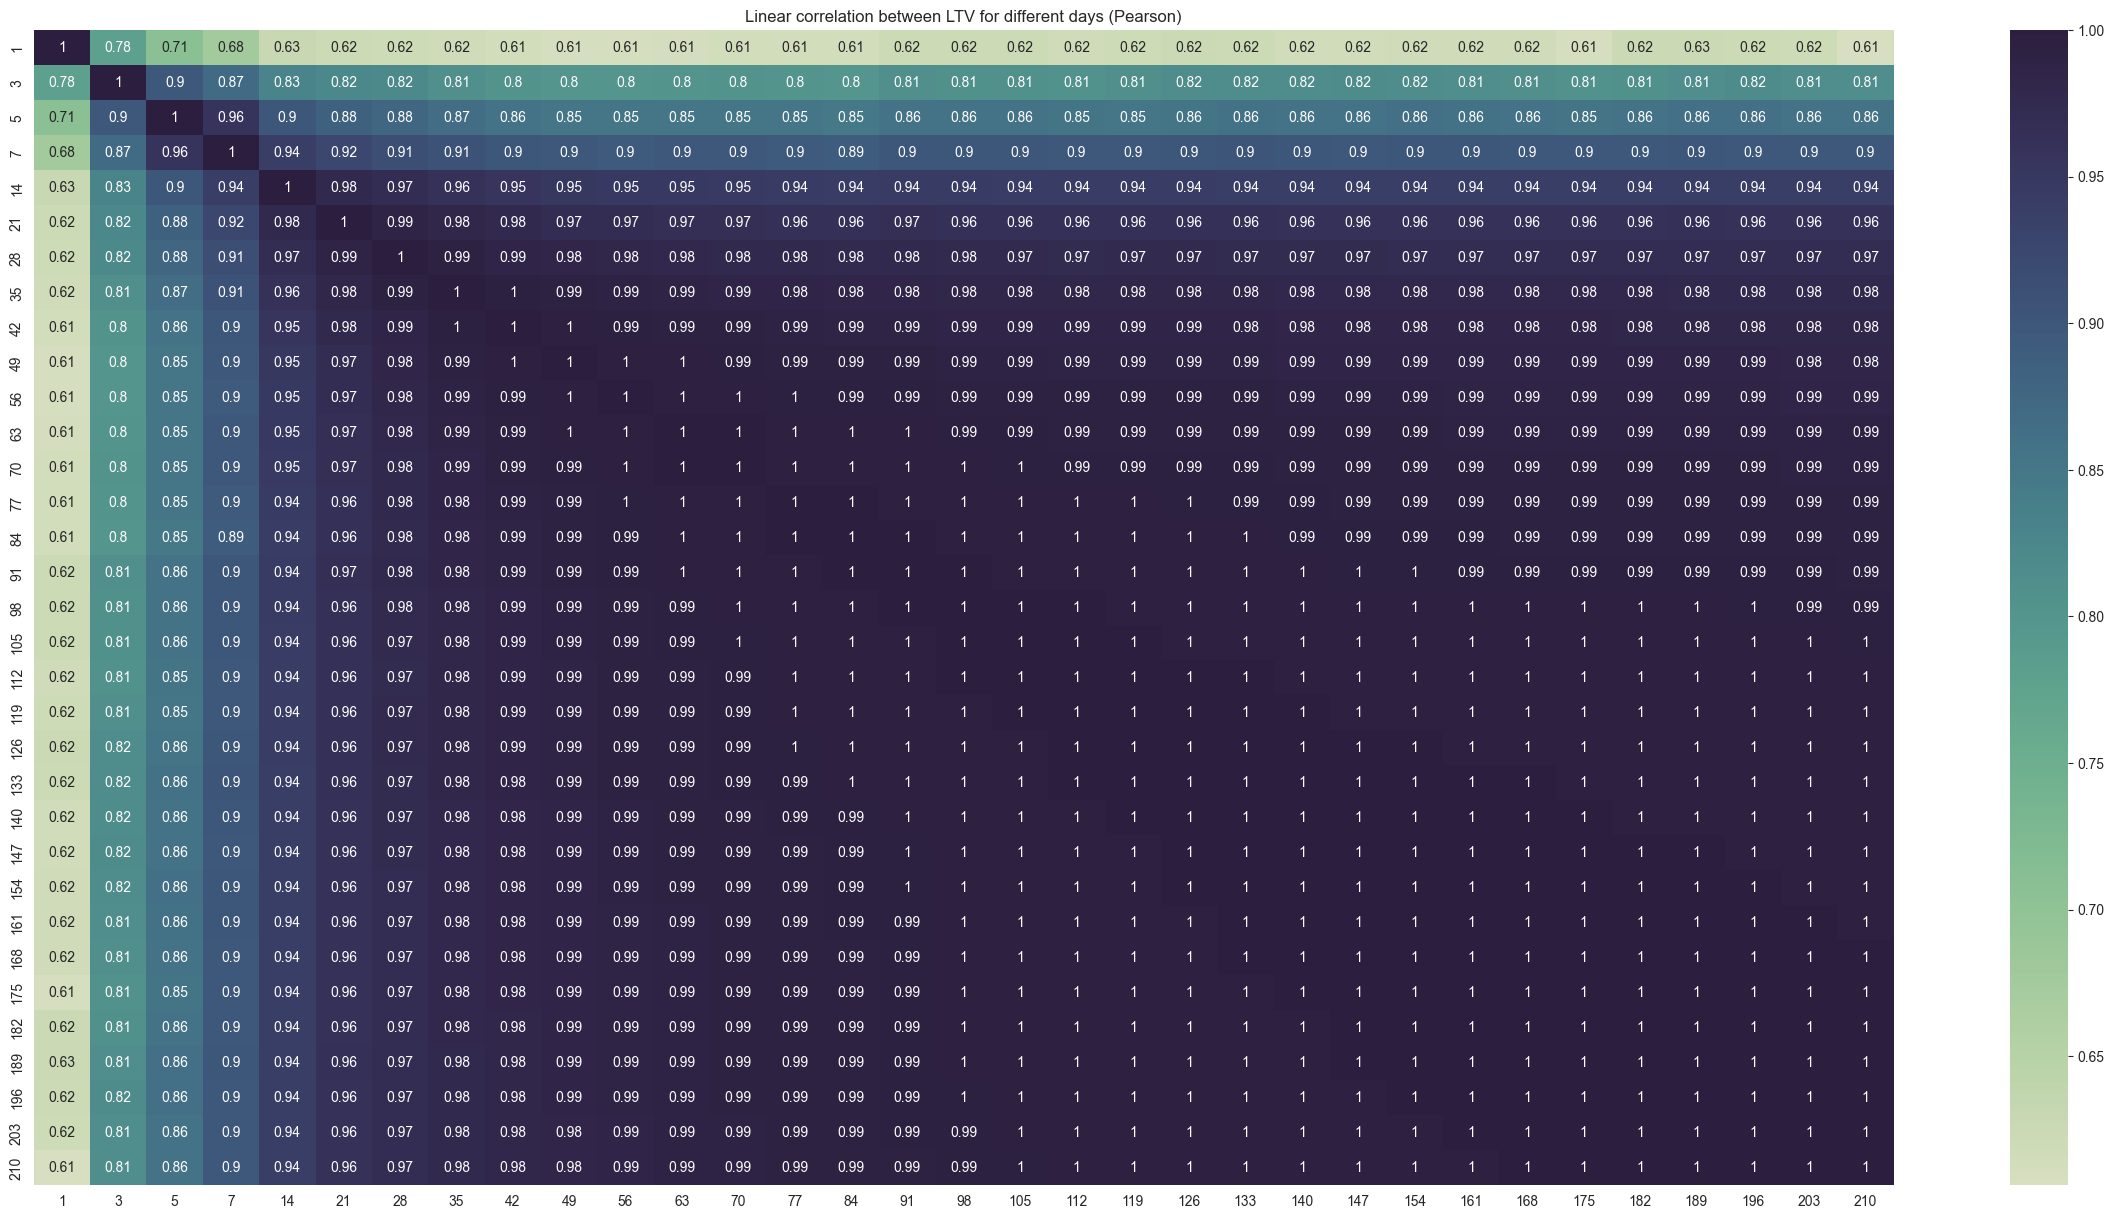

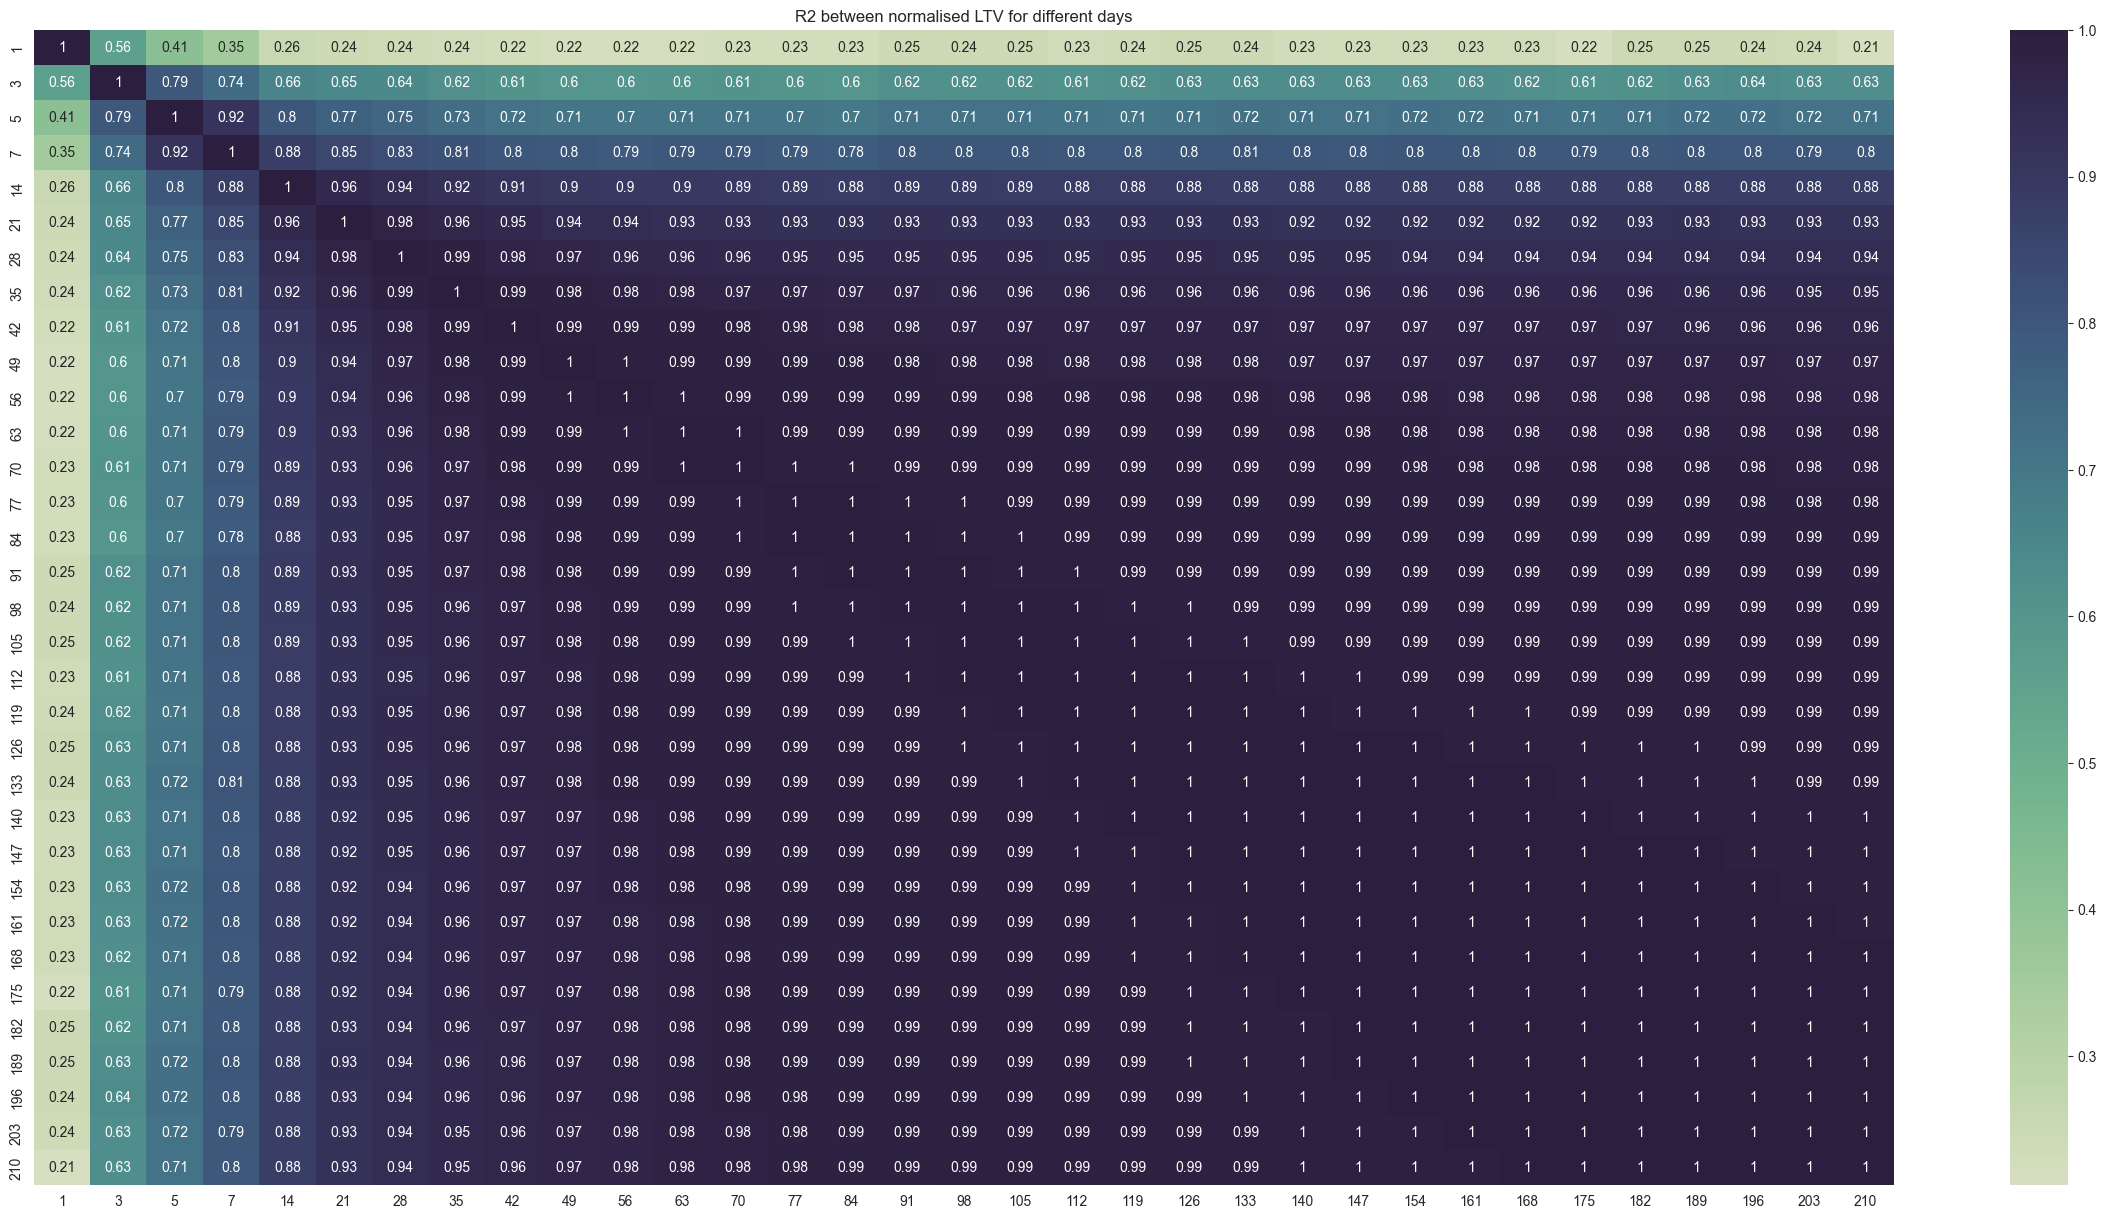

In [26]:
da.plot_linear_corr()

In [27]:
# Not working! 
#da.plot_sankey()

Let's look at this value (how many users will have the same classification flag if we compare different periods between each other)


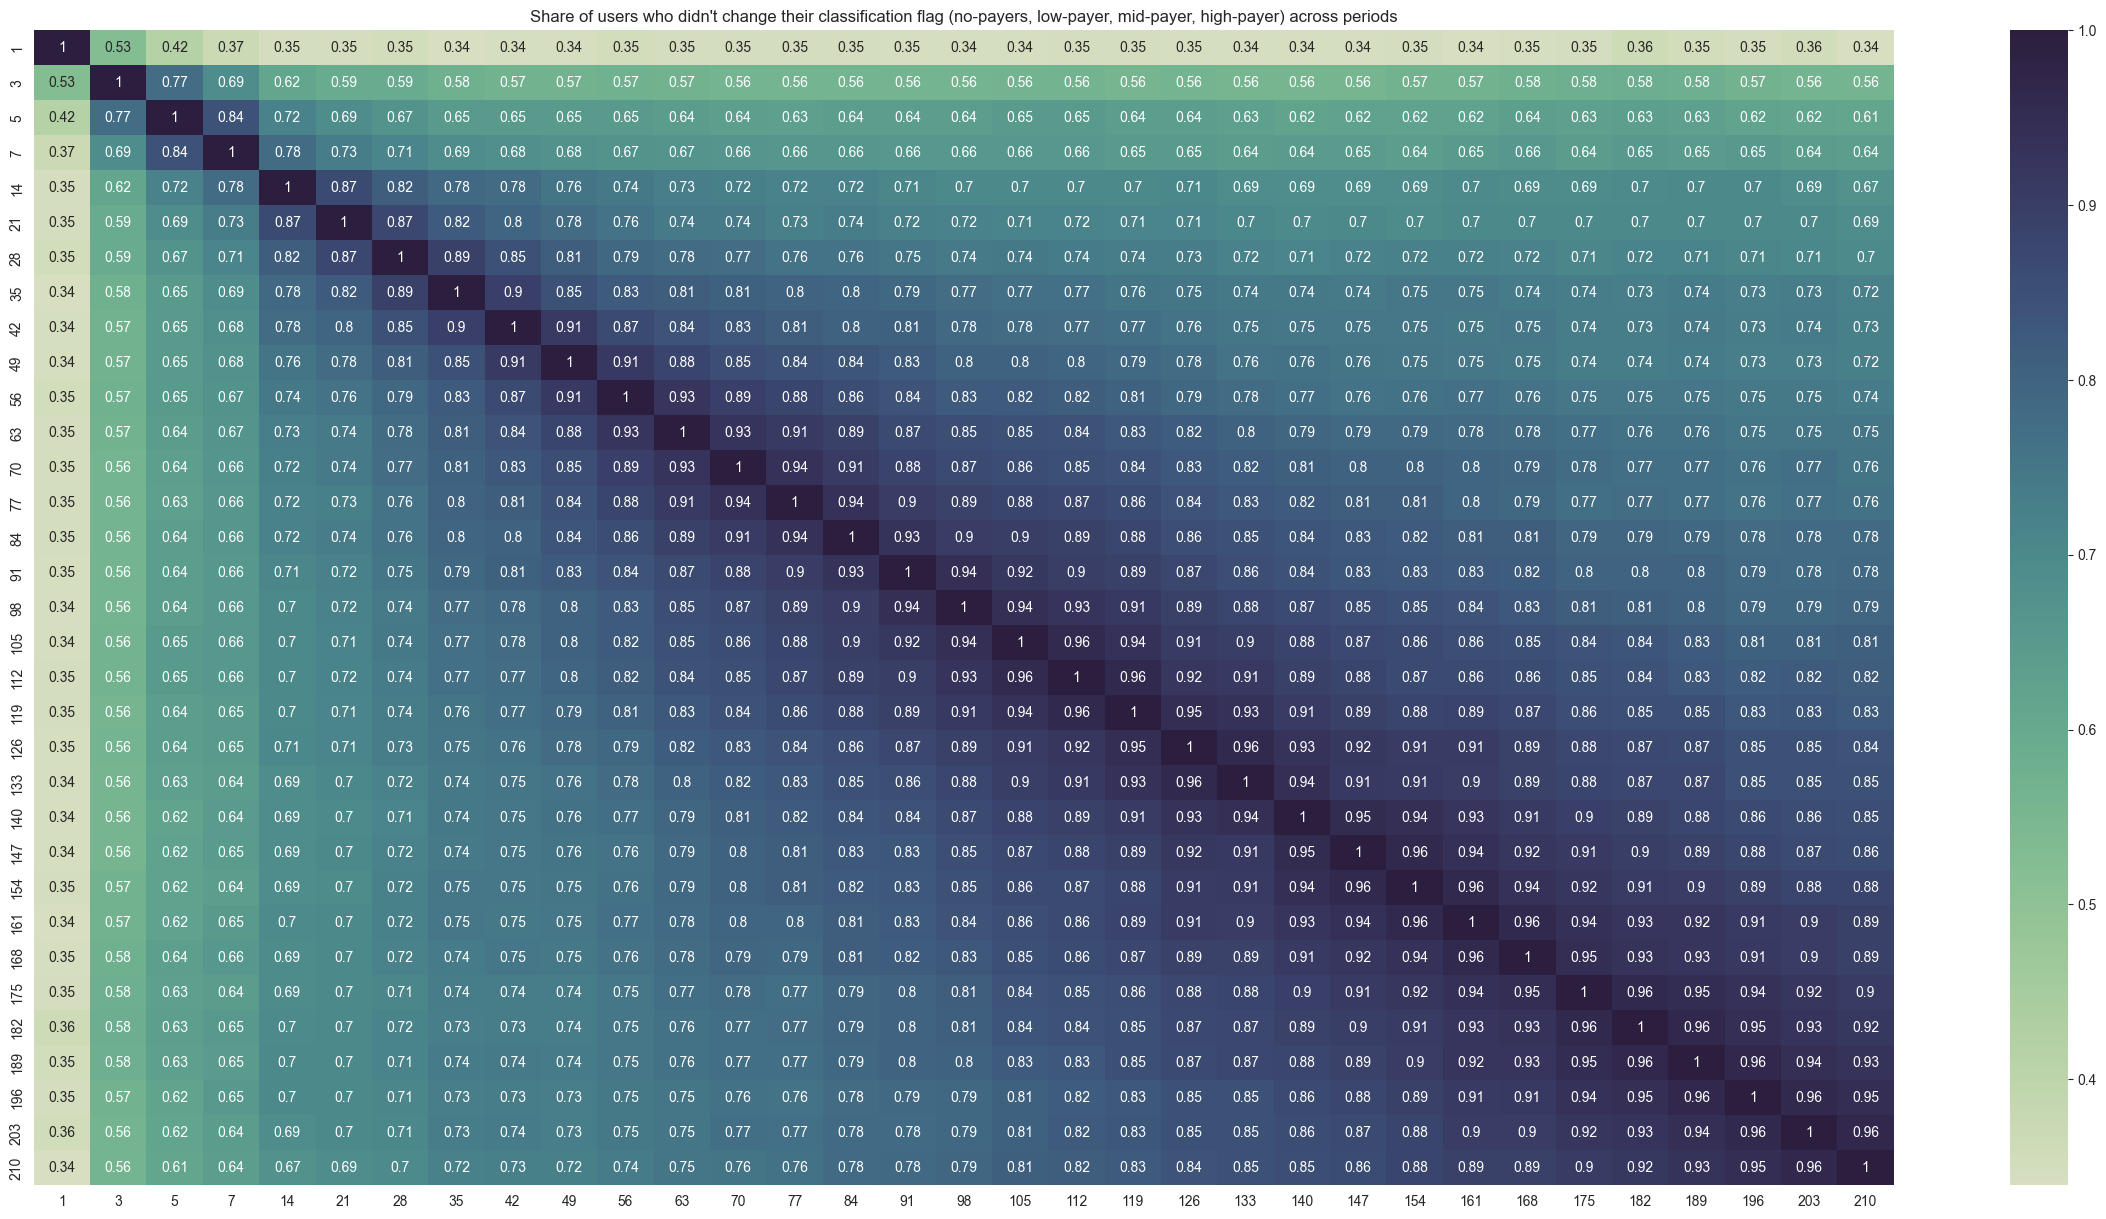

In [28]:
da.plot_class_change()

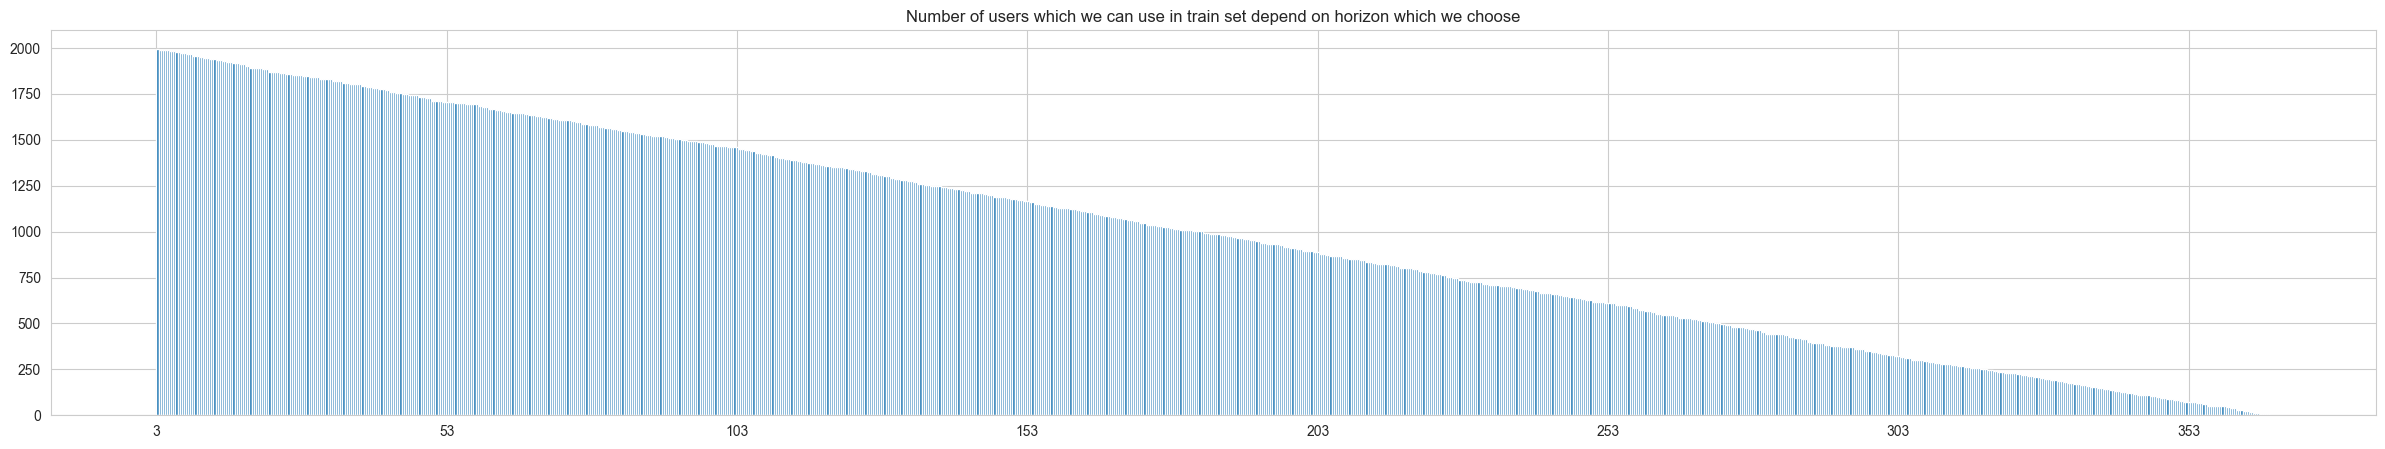

In [29]:
da.plot_drop_off()

/Users/raphaeltamaki/Documents/git/LTVision/src/exploratory.py:744: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=active_user_stats.groupby("lifetime_bins")["purchase_value"]


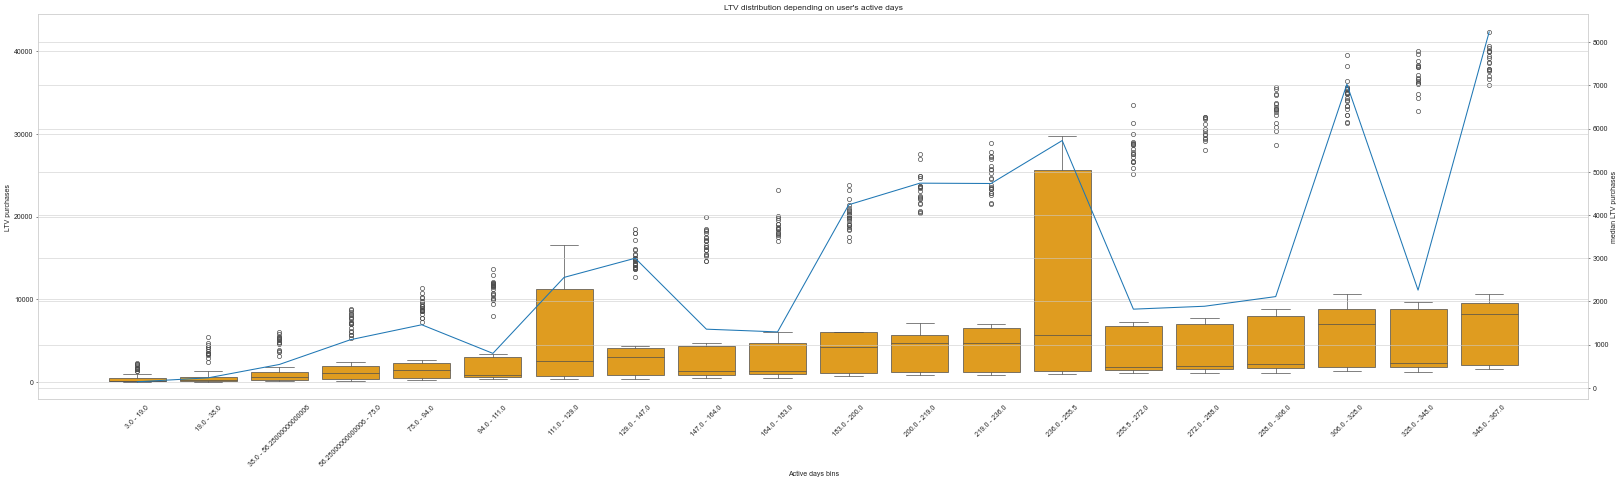

/Users/raphaeltamaki/Documents/git/LTVision/src/exploratory.py:757: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  active_user_stats.groupby("lifetime_bins")["purchase_value"].quantile(
/Users/raphaeltamaki/Documents/git/LTVision/src/exploratory.py:781: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=active_user_stats.groupby("lifetime_bins")["purchase_value"]


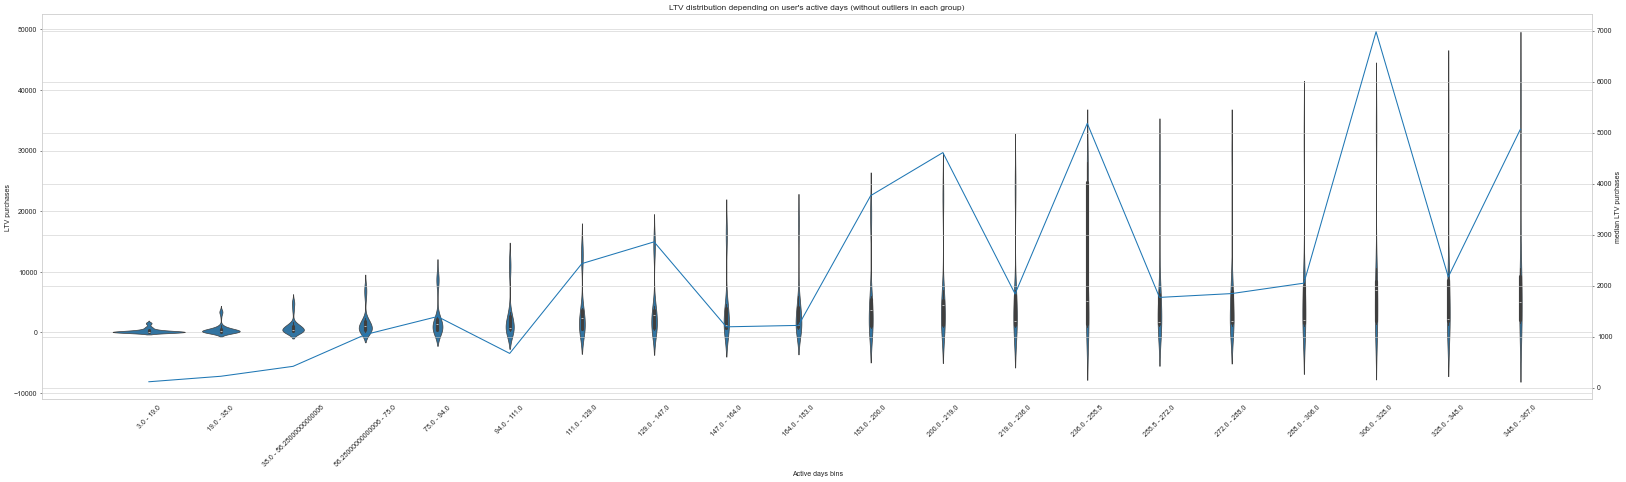

In [30]:
# Needs better name! 
da.plot_()

/Users/raphaeltamaki/Documents/git/LTVision/src/exploratory.py:831: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=active_user_stats.groupby("lifetime_bins")["purchase_value"]


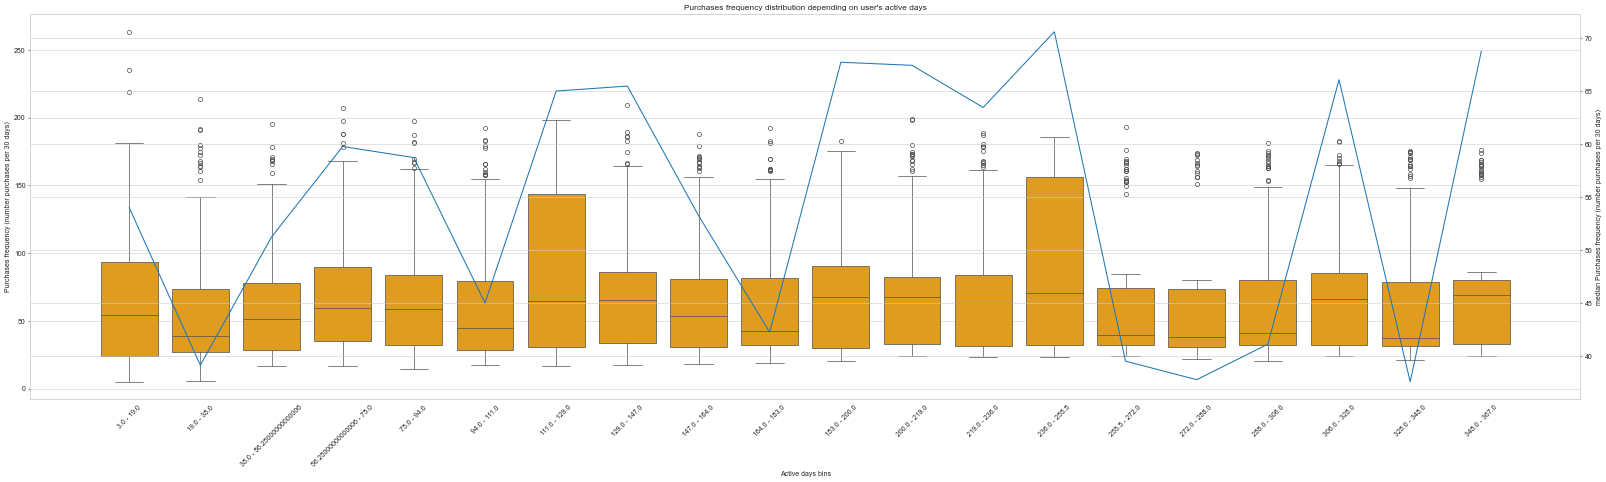

/Users/raphaeltamaki/Documents/git/LTVision/src/exploratory.py:845: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  active_user_stats.groupby("lifetime_bins")["purchase_value"].quantile(
/Users/raphaeltamaki/Documents/git/LTVision/src/exploratory.py:869: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=active_user_stats.groupby("lifetime_bins")["purchase_value"]


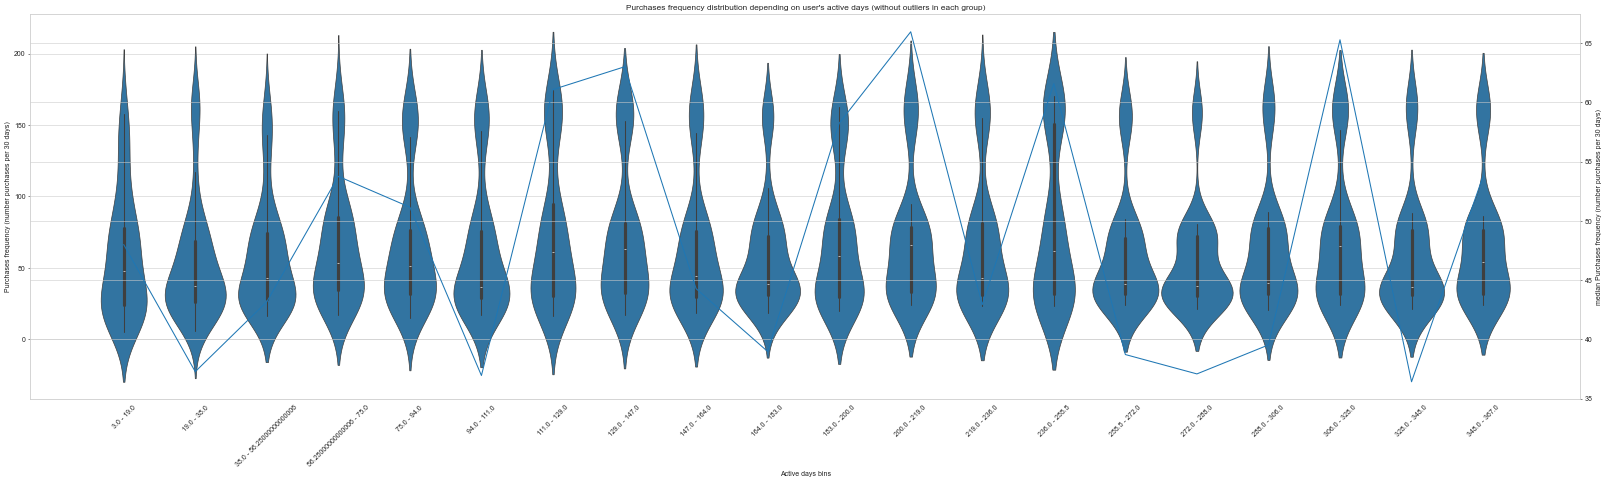

In [31]:
da.plot_freq()

/Users/raphaeltamaki/Documents/git/LTVision/src/exploratory.py:914: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=active_user_stats.groupby("lifetime_bins")["purchase_value"]


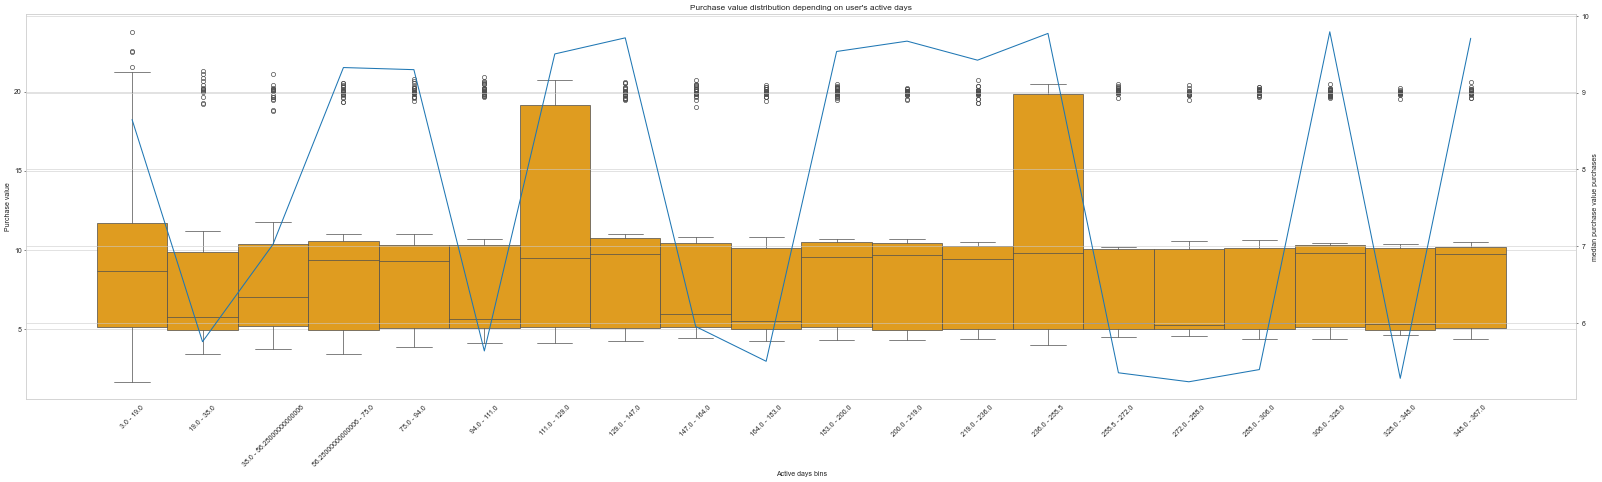

/Users/raphaeltamaki/Documents/git/LTVision/src/exploratory.py:928: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  active_user_stats.groupby("lifetime_bins")["purchase_value"].quantile(
/Users/raphaeltamaki/Documents/git/LTVision/src/exploratory.py:952: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=active_user_stats.groupby("lifetime_bins")["purchase_value"]


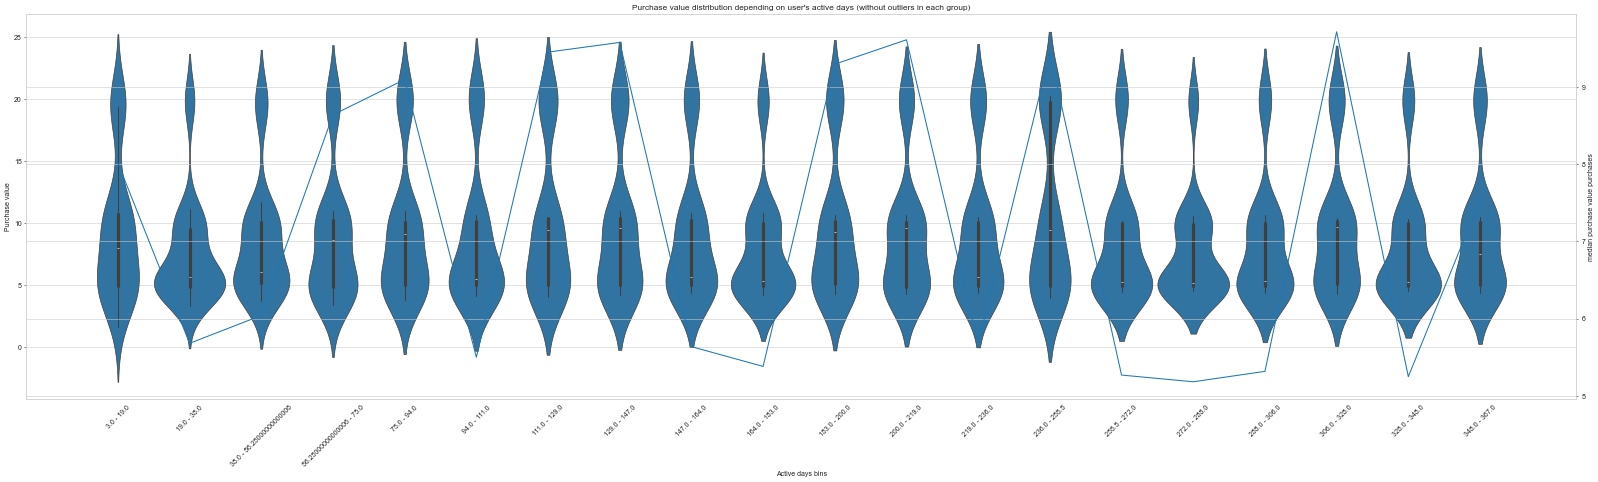

In [32]:
da.plot_apv()

Interpretation: Correlation value can be [-1,1]. If you have correlation closer to 0, it means that you can use models where these two variables describes different models.


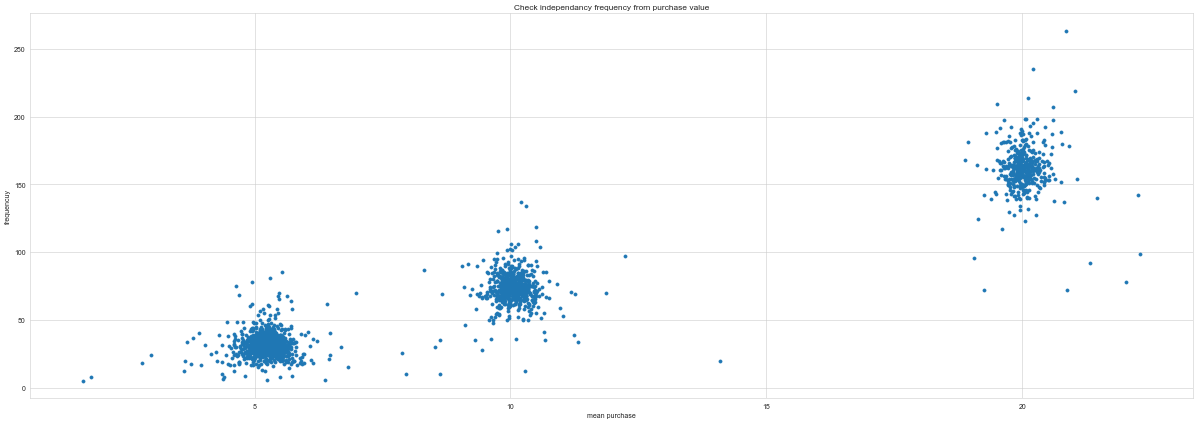

linear_corr=0.97


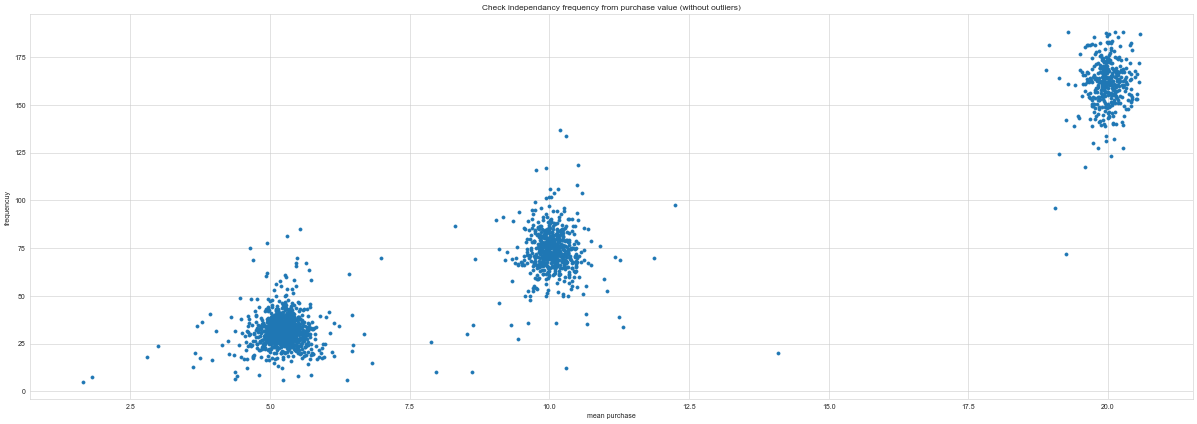

linear_corr=0.97


In [33]:
da.plot_corr_freq_apv()

<Axes: >

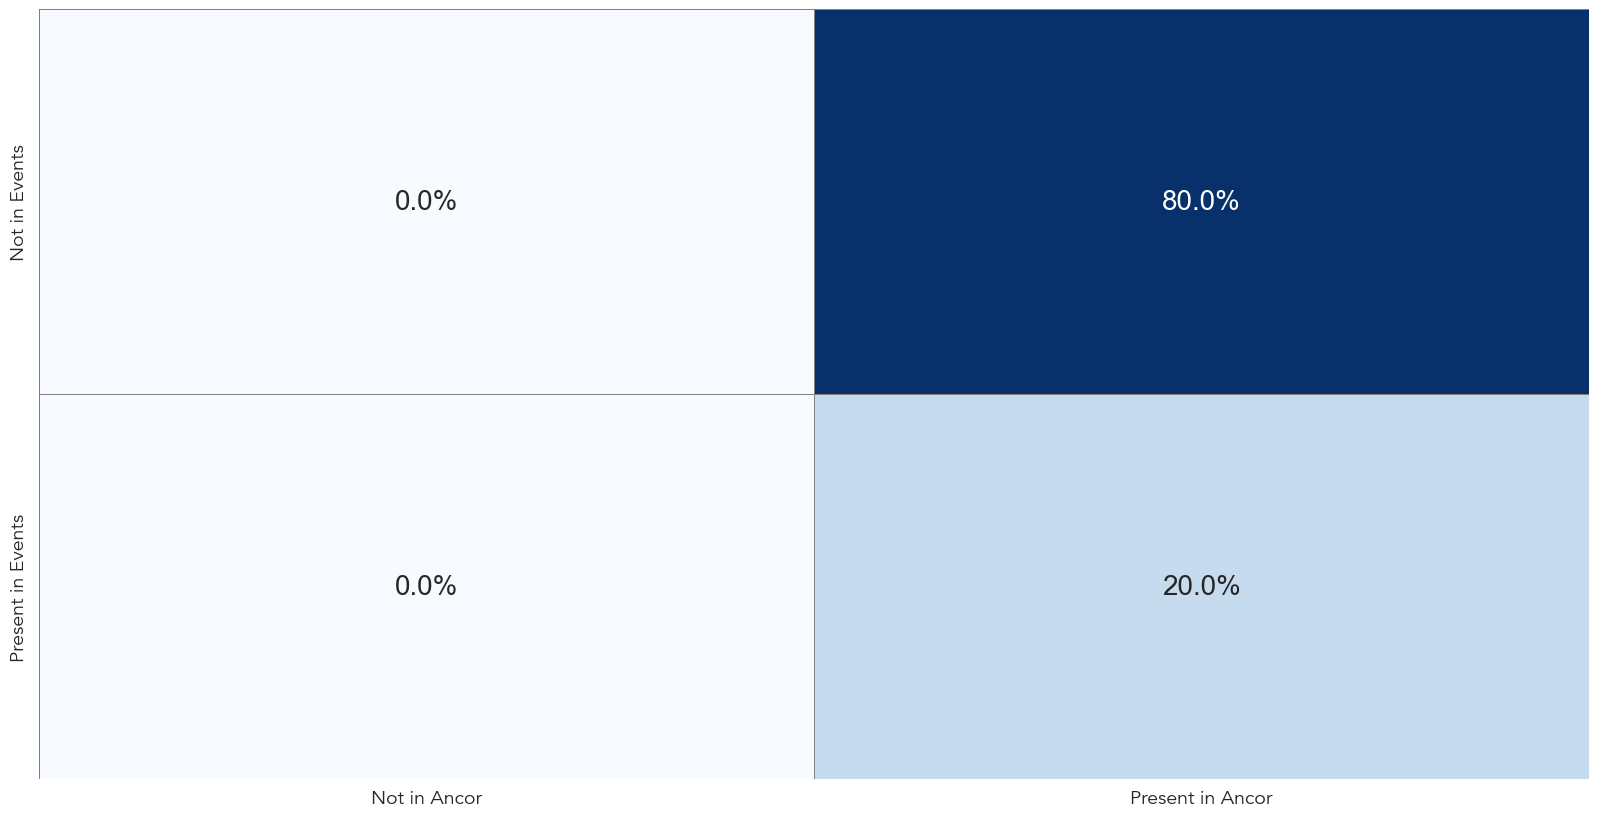

In [34]:
da.plot_users_intersection()

/Users/raphaeltamaki/Documents/git/LTVision/src/graph.py:214: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grid.ax.set_xticklabels(
/Users/raphaeltamaki/Documents/git/LTVision/src/graph.py:219: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grid.ax.set_yticklabels(


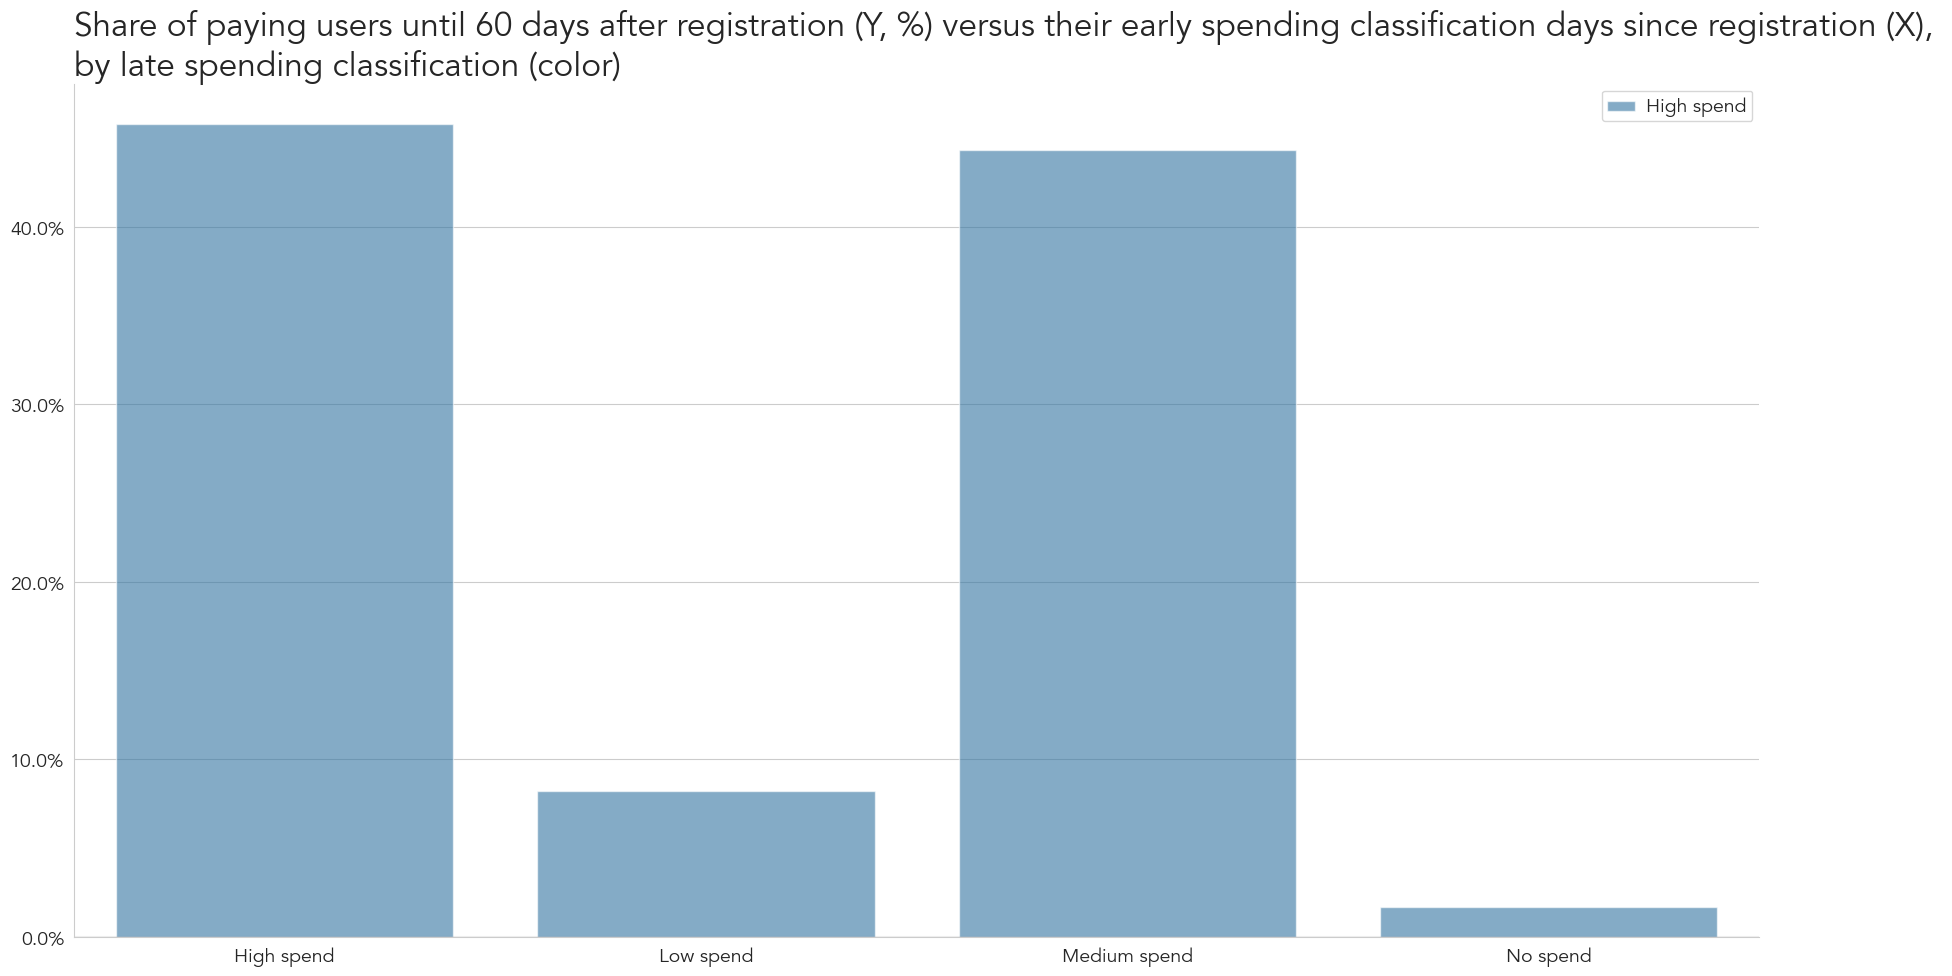

In [35]:
da.plot_paying_users_flow(days_limit=60, early_limit=7, spending_breaks={'No spend': 0, 'Low spend': 10, 'Medium spend': 100, 'High spend': 99999})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/raphaeltamaki/Documents/git/LTVision/src/graph.py:214: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grid.ax.set_xticklabels(
/Users/raphaeltamaki/Documents/git/LTVision/src/graph.py:219: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grid.ax.set_yticklabels(


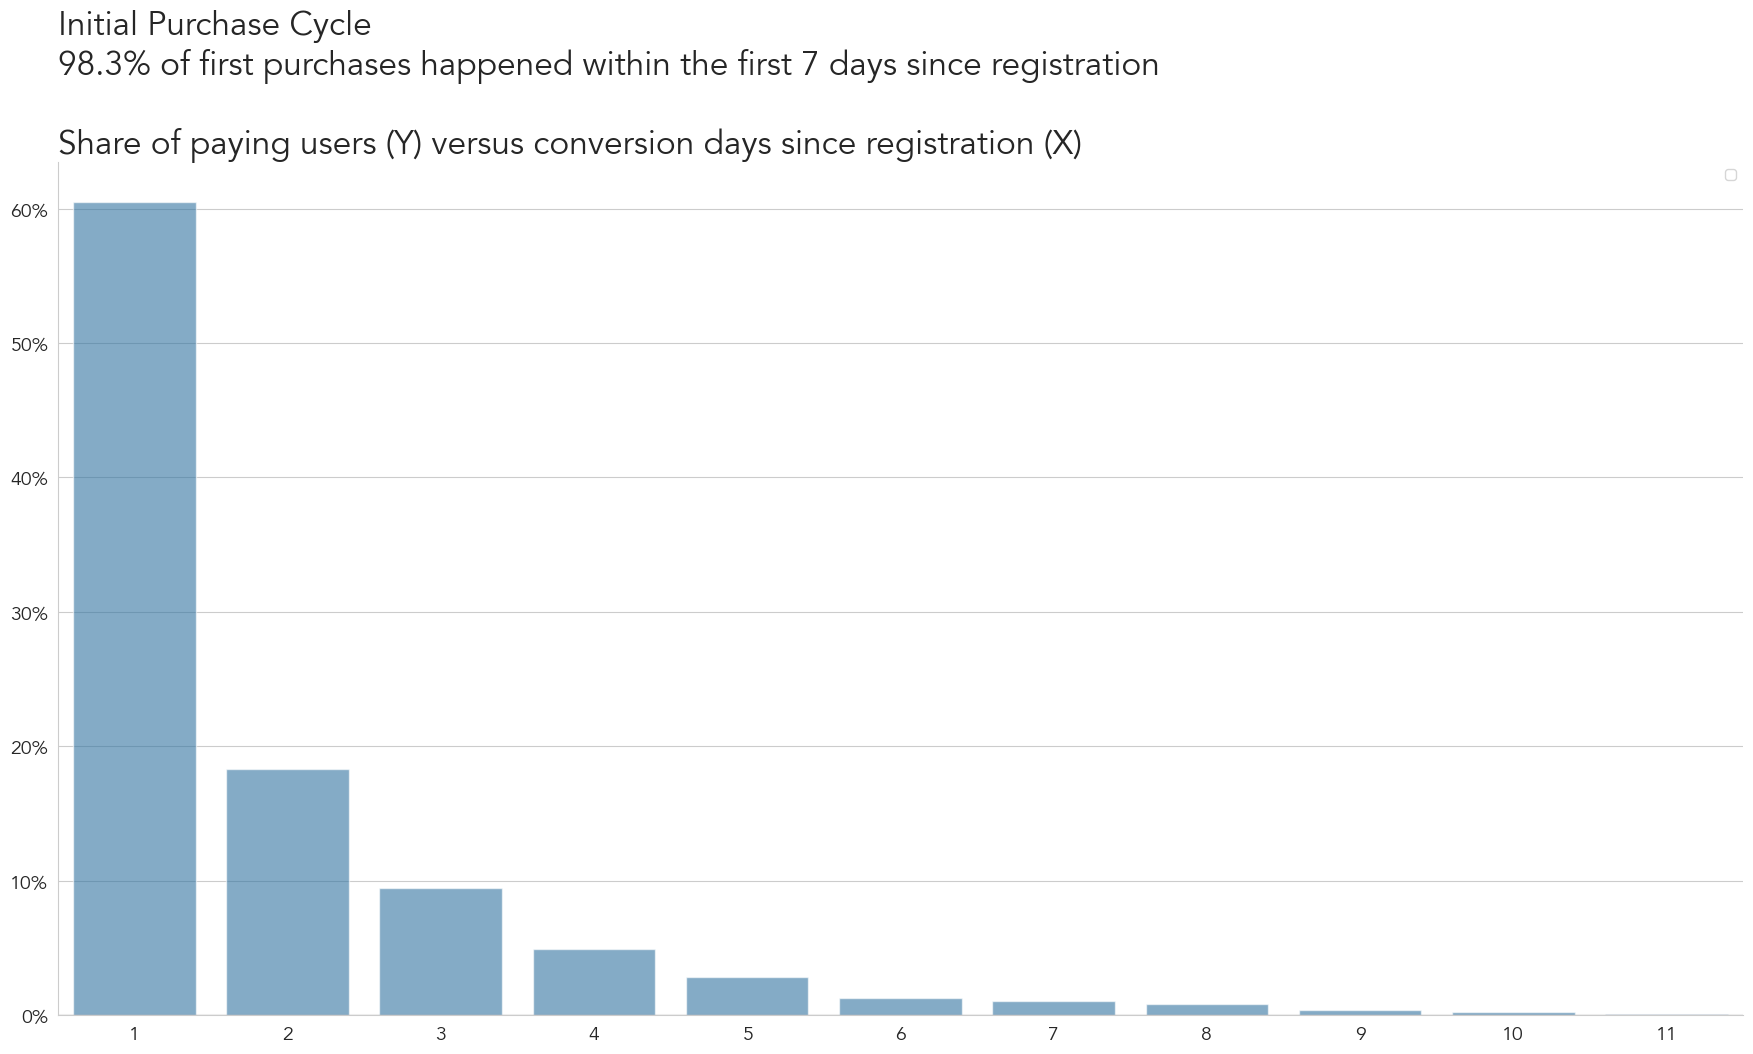

In [36]:
da.histogram_per_conversion_day(days_limit=60)